In [1]:
import sys
import os
sys.path.append('..')
# Import necessary libraries and the CreditScoringModel class
import pandas as pd
from scripts.credit_scoring import CreditScoringModel

In [3]:
df = pd.read_csv('../data/processed_data.csv')

# Initialize the CreditScoringModel
cs_model = CreditScoringModel(df)

In [4]:
# Step 1: Calculate RFMS scores
rfms_df = cs_model.calculate_rfms()

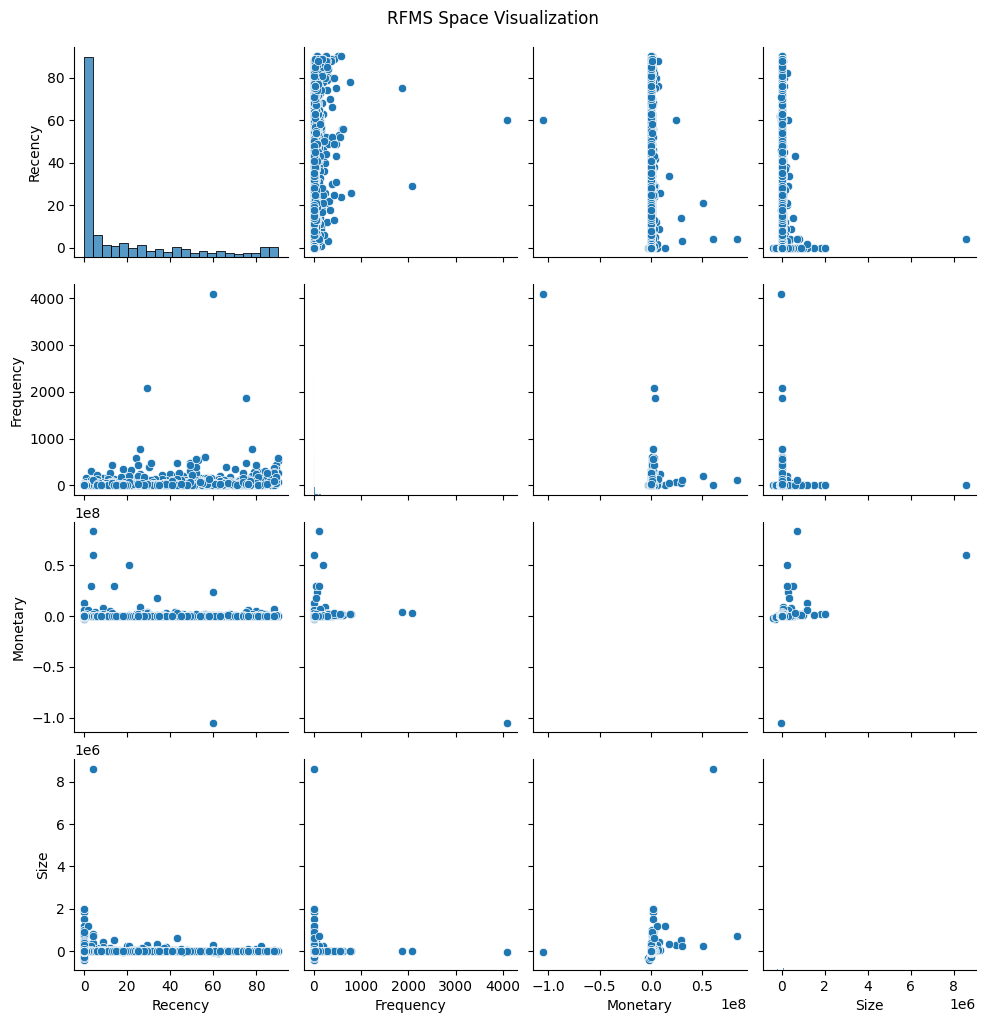

In [5]:
# Step 2: Visualize the RFMS space
cs_model.visualize_rfms_space(rfms_df)

In [6]:
# Step 3: Classify users as good or bad based on RFMS
rfms_classified_df = cs_model.classify_users(rfms_df)


In [7]:
# Step 4: Calculate Information Value (IV) for each RFMS feature
iv_values = cs_model.calculate_information_value(rfms_classified_df)


Information Value (IV) for each feature:
Recency: 0.7265280124046675
Frequency: 1.5151995651767458
Monetary: 2.094642129103403
Size: 2.100831517919918


c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\notebooks\..\scripts\credit_scoring.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\notebooks\..\scripts\credit_scoring.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

In [8]:
import matplotlib.pyplot as plt

# Assuming you already have the woef_values and iv_values from the previous calculations
def plot_woe(woe_df, title='Weight of Evidence (WoE) for Features'):
    """
    Plots the Weight of Evidence (WoE) for each feature.
    """
    plt.figure(figsize=(10, 6))
    woe_df.plot(kind='bar', legend=False)
    plt.title(title)
    plt.ylabel('WoE')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_iv(iv_values, title='Information Value (IV) for Features'):
    """
    Plots the Information Value (IV) for each feature.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(iv_values.keys(), iv_values.values(), color='skyblue')
    plt.title(title)
    plt.ylabel('IV')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [9]:
# Calculate WoE for each feature
woe_recency, iv_recency = cs_model.calculate_woe_iv(rfms_classified_df, 'Recency', 'RiskLabel')
woe_frequency, iv_frequency = cs_model.calculate_woe_iv(rfms_classified_df, 'Frequency', 'RiskLabel')
woe_monetary, iv_monetary = cs_model.calculate_woe_iv(rfms_classified_df, 'Monetary', 'RiskLabel')
woe_size, iv_size = cs_model.calculate_woe_iv(rfms_classified_df, 'Size', 'RiskLabel')

c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\notebooks\..\scripts\credit_scoring.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\zelalem.wubet\projects\personal\ten-academy\credit_scoring_model\notebooks\..\scripts\credit_scoring.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

In [10]:
# Create a DataFrame to hold WoE values for plotting
woe_values = pd.DataFrame({
    'Feature': ['Recency', 'Frequency', 'Monetary', 'Size'],
    'WoE': [woe_recency['woe'].mean(), woe_frequency['woe'].mean(), woe_monetary['woe'].mean(), woe_size['woe'].mean()]
})

<Figure size 1000x600 with 0 Axes>

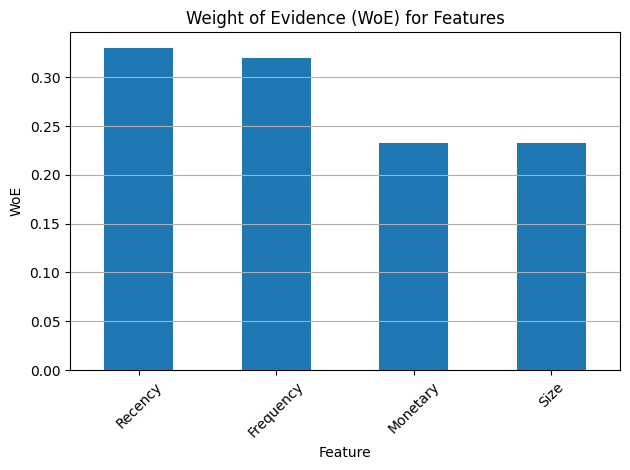

In [11]:
# Plot WoE values
plot_woe(woe_values.set_index('Feature'), title='Weight of Evidence (WoE) for Features')



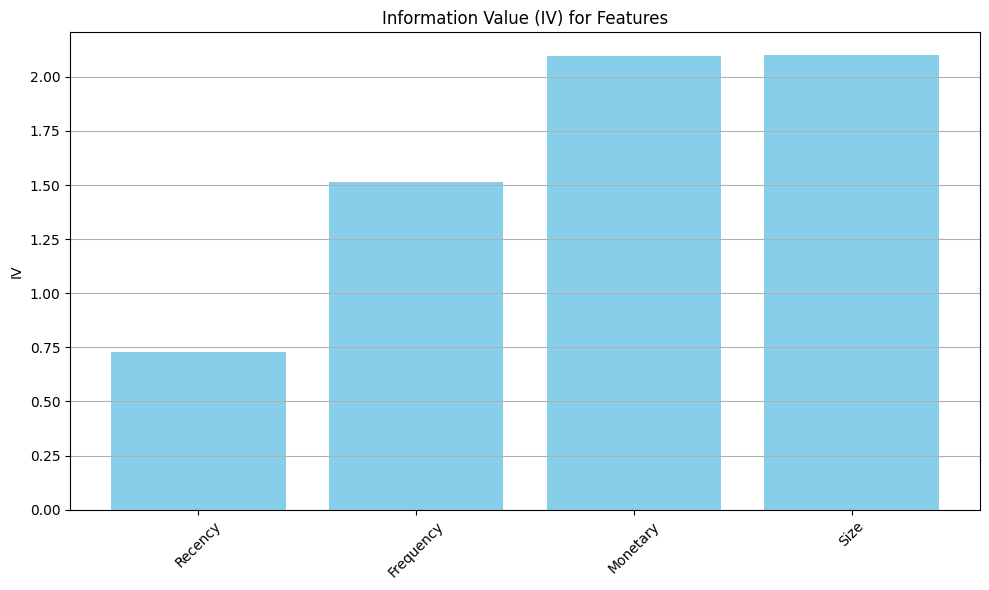

In [13]:
# Plot IV values
iv_values = {
    'Recency': iv_recency,
    'Frequency': iv_frequency,
    'Monetary': iv_monetary,
    'Size': iv_size
}
plot_iv(iv_values, title='Information Value (IV) for Features')

## Explanation of Key Components:
* RFMS Calculation: Calculates Recency, Frequency, Monetary, and Size for each customer.
* User Classification: Classifies users as 'good' or 'bad' based on the RFMS scores.
* WoE Calculation: Implements a custom method to calculate Weight of Evidence (WoE) and Information Value (IV).
* Visualization: Provides a visualization of the RFMS space.


## Conclusion
This complete code should work without the xverse dependency, utilizing a custom approach for WoE and IV calculations. 